In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("SpotifyAudioFeaturesNov2018.csv")
dataOG = pd.read_csv("SpotifyAudioFeaturesNov2018.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116372 entries, 0 to 116371
Data columns (total 17 columns):
artist_name         116372 non-null object
track_id            116372 non-null object
track_name          116372 non-null object
acousticness        116372 non-null float64
danceability        116372 non-null float64
duration_ms         116372 non-null int64
energy              116372 non-null float64
instrumentalness    116372 non-null float64
key                 116372 non-null int64
liveness            116372 non-null float64
loudness            116372 non-null float64
mode                116372 non-null int64
speechiness         116372 non-null float64
tempo               116372 non-null float64
time_signature      116372 non-null int64
valence             116372 non-null float64
popularity          116372 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 15.1+ MB


In [4]:
data['mode'].value_counts()

1    70700
0    45672
Name: mode, dtype: int64

data.tail(10)

In [5]:
data.isnull().sum()

artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


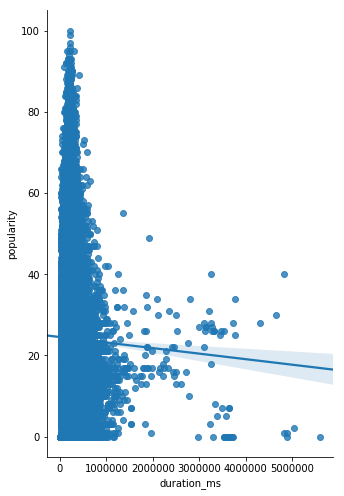

In [6]:
sns.pairplot(data,x_vars=['duration_ms'],y_vars=['popularity'],kind='reg',aspect=0.7,height=7)

In [7]:
data['duration_ms'] = data['duration_ms']/60000
data['duration_ms'].describe()
data['duration_ms'] = pd.cut(data['duration_ms'], [0,3,5,7,9],labels=[0,3,5,7])
data.loc[data['duration_ms'] == 0, 'duration_ms'] = 0
data.loc[data['duration_ms'] == 3, 'duration_ms'] = 3
data.loc[data['duration_ms'] == 5, 'duration_ms'] = 5
data.loc[data['duration_ms'] == 7 ,'duration_ms'] = 7

data

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,3,0.33900,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,3,0.55700,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,0,0.72300,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,63
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,0,0.57900,0.912000,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,9
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,0,0.79200,0.878000,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,8
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,0,0.41700,0.919000,9,0.1060,-10.783,0,0.0793,120.025,4,0.8370,8
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,0,0.72000,0.863000,4,0.0727,-8.895,0,0.1510,124.003,4,0.9340,8
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,3,0.34800,0.000000,9,0.1070,-12.569,1,0.4510,142.111,4,0.1800,10
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,0,0.47200,0.847000,8,0.0959,-9.008,1,0.0551,120.034,4,0.6220,8
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,0,0.73100,0.910000,11,0.0727,-8.932,1,0.0697,124.031,4,0.9440,7


In [8]:
print(data.groupby('time_signature')['popularity'].mean())
#print(data.tail())

time_signature
0    12.789272
1    19.119522
3    20.619333
4    24.851785
5    20.315843
Name: popularity, dtype: float64


Text(0,0.5,'popularity')

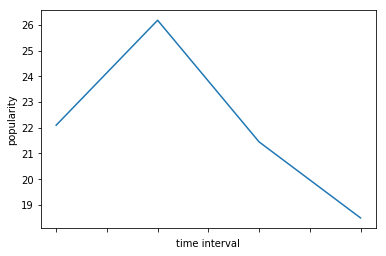

In [9]:
x = data['duration_ms']
y = data['popularity']
fig = plt.figure()
ax = fig.add_subplot(111)
data.groupby(['duration_ms'])['popularity'].mean().plot(ax=ax)
ax.set_xlabel('time interval')
ax.set_ylabel('popularity')

In [10]:
data['speechiness'].describe()
data['speechiness'] = pd.cut(data['speechiness'], [0,0.33,0.66,1],labels=[0,0.33,0.66])
data.loc[data.speechiness == 0, 'speechiness'] = 0
data.loc[data.speechiness == 0.33, 'speechiness'] = 0.33
data.loc[data.speechiness == 0.66, 'speechiness'] = 0.66
data.speechiness.isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
116342    False
116343    False
116344    False
116345    False
116346    False
116347    False
116348    False
116349    False
116350    False
116351    False
116352    False
116353    False
116354    False
116355    False
116356    False
116357    False
116358    False
116359    False
116360    False
116361    False
116362    False
116363    False
116364    False
116365    False
116366    False
116367    False
116368    False
116369    False
116370    False
116371    False
Name: speechiness, Lengt

Text(0.5,1,'distubtion of popularity ranges')

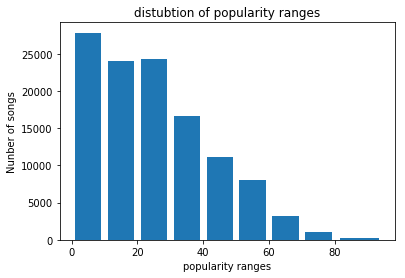

In [11]:
bins = [0,10,20,30,40,50,60,70,80,95]
plt.hist(data['popularity'],bins,histtype='bar', rwidth=0.8)
plt.xlabel('popularity ranges')
plt.ylabel('Nunber of songs')
plt.title('distubtion of popularity ranges')

Text(0,0.5,'loudness average')

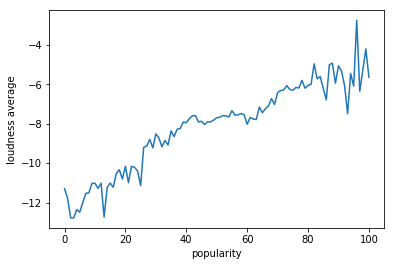

In [12]:
data.groupby(['popularity'])['loudness'].mean().plot()
plt.ylabel('loudness average')

In [13]:
X = data.drop(['popularity','artist_name','track_id','track_name'],axis=1)
Y = data['popularity']

In [14]:
X.fillna(0,inplace=True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [17]:
# import model
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
feature_cols = list(X.columns.values)
list(zip(feature_cols, linreg.coef_))

[('acousticness', 1.412136799008571),
 ('danceability', 5.087789543350999),
 ('duration_ms', 0.11498366226290899),
 ('energy', -4.860999193690887),
 ('instrumentalness', -5.851635335383496),
 ('key', -0.008278406119025394),
 ('liveness', -2.2334922518488414),
 ('loudness', 0.6601180642388478),
 ('mode', -0.3448736228106743),
 ('speechiness', -7.125570900298174),
 ('tempo', -0.0034591461183093894),
 ('time_signature', 0.5776507022809276),
 ('valence', -4.416134885243763)]

In [19]:
from sklearn import metrics
Y_pred = linreg.predict(X_test)
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

13.99219313203669
17.231986936319863


In [20]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
print(np.sqrt(-cross_val_score(lr, X, Y, cv=10, scoring='neg_mean_squared_error')).mean())
#without mode and time signature
cols = ['danceability', 'duration_ms','instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence']
X2=X[cols]
print(np.sqrt(-cross_val_score(lr, X2, Y, cv=10, scoring='neg_mean_squared_error')).mean())

17.235442520366494
17.24273098360805


In [21]:
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(X_train,Y_train)
Y_pred = rg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

17.231993743703416


In [22]:
#normlize
X = dataOG.drop(['popularity','artist_name','track_id','track_name','mode','time_signature'],axis=1)
n = (X - X.min()) / (X.max() - X.min())
n['mode'] = dataOG['mode']
n['time_signature'] = dataOG['time_signature']
n.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,mode,time_signature
0,0.005843,0.745984,0.041944,0.339,0.000,0.090909,0.081281,0.846552,0.423395,0.815763,0.118,1,4
1,0.024498,0.849398,0.037739,0.557,0.000,0.727273,0.286286,0.853331,0.473085,0.636079,0.371,1,4
2,0.025100,0.605422,0.024204,0.723,0.000,0.818182,0.082482,0.875481,0.046998,0.459895,0.382,0,4
3,0.029518,0.803213,0.021791,0.579,0.912,0.454545,0.099499,0.774714,0.072567,0.492045,0.641,0,4
4,0.000035,0.786145,0.021548,0.792,0.878,0.636364,0.033233,0.804501,0.068427,0.480221,0.928,1,4


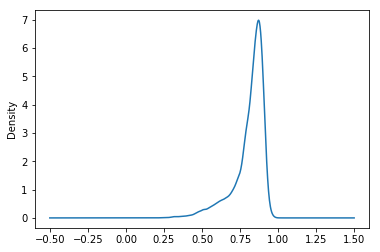

In [23]:
n['loudness'].plot.kde()

In [24]:
lr = LinearRegression()
print(np.sqrt(-cross_val_score(lr, n, Y, cv=10, scoring='neg_mean_squared_error')).mean())

17.234721943889465


In [25]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=3)
print(np.sqrt(-cross_val_score(regr, n, Y, cv=10, scoring='neg_mean_squared_error')).mean())

17.18230780886695


In [26]:
print(np.sqrt(-cross_val_score(regr, n.drop(['speechiness','tempo','duration_ms','liveness','key','valence'],axis=1), Y, cv=10, scoring='neg_mean_squared_error')).mean())

17.179648537724173


In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=1, n_estimators=100)
print(np.sqrt(-cross_val_score(rf, n.drop(['speechiness','tempo','duration_ms','liveness','key','valence'],axis=1), Y, cv=5, scoring='neg_mean_squared_error')).mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


18.229524354282397


In [28]:
from sklearn.model_selection import GridSearchCV
#gsc  = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'max_depth': range(5,7),'n_estimators': (50, 100),},cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
#grid_result = gsc.fit(n.drop(['speechiness','tempo','duration_ms','liveness','key','valence'],axis=1), Y)
#print(list(zip(sorted(grid_result.cv_results_.keys()),grid_result.cv_results_.values())))

In [29]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": [10,15],
             'n_estimators': [70,100]}
rand = RandomizedSearchCV(rf, param_dist, cv=5, n_iter=5, random_state=5)
rand.fit(X, Y)
print(rand.best_params_)

ValueError: The total space of parameters 4 is smaller than n_iter=5. For exhaustive searches, use GridSearchCV.

In [ ]:
rf = RandomForestRegressor(max_depth=grid_result.best_params_['max_depth'], random_state=1, n_estimators=grid_result.best_params_['n_estimators'])
print(np.sqrt(-cross_val_score(rf, X.drop(['speechiness','tempo','duration_ms','liveness','key','valence'],axis=1), Y, cv=10, scoring='neg_mean_squared_error')).mean())

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

scaled = min_max_scaler.fit_transform(X.drop(['speechiness','tempo','duration_ms','liveness','key','valence'],axis=1))
print(np.sqrt(-cross_val_score(rf, scaled, Y, cv=5, scoring='neg_mean_squared_error')).mean())

In [ ]:
Y.describe()

In [ ]:
ls = []
for x in range(0,Y.count()):
    ls.append(Y.mean()) #null regressor
np.sqrt(metrics.mean_squared_error(Y, ls))